In [18]:
import numpy as np
import pyCalc as p
import random
p.setMode(p,"loud")
xs = p.var("constant",np.array([[1,1,1,1],
                               [0,1,0,1],
                               [0,0,1,1]]                           
                               , dtype= float))
ys = p.var("constant", np.array([0,0,1,1], dtype=float))
np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(ws, xs, "*")
l1 = p.function(l0, "sigmoid")

l1_error = p.function(ys.T(), l1, "-")
#C(ws) = .5(ys - sig(wx))^2
#dc/dws = (ys - sig(wx)) * sig'(cx) * x
#          1x4  1x4       1x4        3x4
sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l1_error, "rowwise*")
tmp = p.function(xs,l1_delta.T(), "*")

l1.preview()

          rows 3 colss 1
          output will be 3 x 4
          output will be 3 x 4
          trans
          output will be 4 x 1
          output will be 4 x 4
          output will be 3 x 4
          output will be 3 x 4
          trans
          output will be 4 x 3
          valid
          output will be 3 x 3
          My ID is 80 and myoutput will be 3 x 4


In [12]:
print(tmp.value(dict([(ws,weights)])))

[[ 76.12603571  73.04769872  60.28868718]
 [ 62.94629426  60.40091141  49.85087439]
 [ 76.10548055  73.02797475  60.27240833]]


In [13]:
g= []
for i in range(1000):
    weights = weights + tmp.value(dict([(ws,weights)]))
    g.append(np.sum(l1_error.value(dict([(ws,weights)]))))
print(weights)

[[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]


In [9]:
print(l1.value(dict([(ws,weights)])))
print(np.sum(l1_error.value(dict([(ws,weights)]))))

[[ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]]
nan


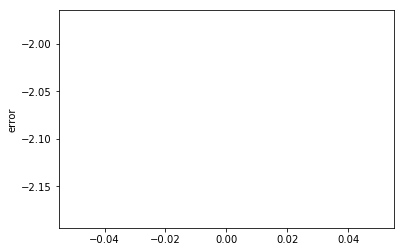

In [10]:
import matplotlib.pyplot as plt
plt.plot(g)
plt.ylabel('error')
plt.show()